<a id="toc"></a>

# <u>Table of Contents</u>

1.) [Imports](#imports)  
2.) [Definitions](#defintions)  
3.) [Background](#background)  
4.) [Pollutants](#pollutants)  
&nbsp;&nbsp;&nbsp;&nbsp; 4.1.) [Missing values](#poll_nan)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.2.) [Fiscal Year](#poll_fiscal)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.3.) [General location](#poll_gen_loc)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.4.) [Specific location](#poll_spec_loc)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.5.) [Substances](#poll_substances)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.6.) [Organisms](#poll_organisms)   
&nbsp;&nbsp;&nbsp;&nbsp; 4.7.) [Result](#poll_result)   
5.) [Histopaths](#histopaths)  
&nbsp;&nbsp;&nbsp;&nbsp; 5.1.) [Data Processsing](#hist_process)   
&nbsp;&nbsp;&nbsp;&nbsp; 5.2.) [Quick Overview](#hist_overview)   
&nbsp;&nbsp;&nbsp;&nbsp; 5.3.) [Missing values](#hist_nan)   
&nbsp;&nbsp;&nbsp;&nbsp; 5.4.) [General features](#hist_gen_feats)   
&nbsp;&nbsp;&nbsp;&nbsp; 5.5.) [Location](#hist_loc)   
&nbsp;&nbsp;&nbsp;&nbsp; 5.6.) [NST Site](#hist_nst_site)   
&nbsp;&nbsp;&nbsp;&nbsp; 5.7.) [Gonadal](#hist_gonadal)   
&nbsp;&nbsp;&nbsp;&nbsp; 5.8.) [Dermo](#hist_dermo)   
&nbsp;&nbsp;&nbsp;&nbsp; 5.9.) [Correlation plot](#hist_corr)   
&nbsp;&nbsp;&nbsp;&nbsp; 5.10.) [Volume](#hist_vol)   
&nbsp;&nbsp;&nbsp;&nbsp; 5.11.) [Size](#hist_size)   
6.) [Appendix](#appendix)  
&nbsp;&nbsp;&nbsp;&nbsp; 6.1.) [Appendix A: Links to different PAHs](#app_a)   
7.) [References](#references)  
8.) [Further Reading](#further_reading)  

---
<a id="imports"></a>

# [^](#toc)<u>Imports</u>

In [2]:
### Standard imports
import numpy as np
import pandas as pd
pd.options.display.max_columns = 50

# Will count number of unique words in a sentence
from collections import Counter

### Standard plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Fancy plot of Earth (This library is really cool and fast!)
import folium
from folium.plugins import MarkerCluster

### Advanced plotting import
# Altair
import altair as alt
alt.renderers.enable('notebook')
# Plotly
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

# Helps visualize wordy features
from wordcloud import WordCloud

### Removes warnings from output
import warnings
warnings.filterwarnings('ignore')

DATA_PATH = "data/"

### Styling helpers

In [3]:
# A short hand way to plot most bar graphs
def pretty_bar(data, ax, xlabel=None, ylabel=None, title=None, int_text=False, x=None, y=None):
    
    if x is None:
        x = data.values
    if y is None:
        y = data.index
    
    # Plots the data
    fig = sns.barplot(x, y, ax=ax)
    
    # Places text for each value in data
    for i, v in enumerate(x):
        
        # Decides whether the text should be rounded or left as floats
        if int_text:
            ax.text(0, i, int(v), color='k', fontsize=14)
        else:
            ax.text(0, i, round(v, 3), color='k', fontsize=14)
     
    ### Labels plot
    ylabel != None and fig.set(ylabel=ylabel)
    xlabel != None and fig.set(xlabel=xlabel)
    title != None and fig.set(title=title)

def plotly_bar(df, col):
    value_counts = df[col].value_counts()
    labels = list(value_counts.index)
    values = list(value_counts.values)
    trace = go.Bar(x=labels, y=values)
    return trace
    
### Used to style Python print statements
class color:
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

---
<a id="definitions"></a>

# [^](#toc) <u>Definitions</u>

#### Organizations
 - [NOAA](https://en.wikipedia.org/wiki/National_Oceanic_and_Atmospheric_Administration) - The National Oceanic and Atmospheric Administration (NOAA) is an American agency that monitors conditions of oceans, major waterways, and the atmosphere.
 - [Mussel Watch](https://en.wikipedia.org/wiki/Mussel_Watch_Program) - A program under NOAA that monitors concentrations of contaminants in bivalves, sediment, and aquantic lifeforms.  These measurements indirectly provide information on the health of the local environment.
 
#### Chemicals
 - [PAH](https://en.wikipedia.org/wiki/Polycyclic_aromatic_hydrocarbon#Human_health) - Polycyclic aromatic hydrocarbons (PAH) are organic molecules containing only Carbon and Hydrogen.  They are known for their cyclic structure and have strong associations with tar, ash, and coal.  They tend to be linked with Cancer and toxicity.
 - [DDT](https://en.wikipedia.org/wiki/DDT) - A colorless, tasteless, and almost odorless compound infamous for its environmental impact.  (The initialism, DDT, stands for something, but provides zero information if you're not a chemist :))
 - [PCB](https://en.wikipedia.org/wiki/Polychlorinated_biphenyl) - Banned by US law in 1978, this group of organic chlorine compounds is known for its toxicity and neurotoxicity.
 
#### Organisms
 - [Bivalves](https://en.wikipedia.org/wiki/Bivalvia) - A class of mollusc whos body is encloses by a two part shell.  Common examples are clams, oysters, cockles, mussels, and scallops.

---
<a id="background"></a>

# [^](#toc) <u>Background</u>

[Mussel Watch](https://en.wikipedia.org/wiki/Mussel_Watch_Program) is a 


### Why Mussels?

Other species are looked at as well such as coral.  10% of coral reefs have disappeared 

Monitoring mussel heath is an indirect way of monitoring water quaility.  This is because mussels.  In addition bivalves and contain Calcium carbonate

Bivalves are filter-feeders, but they are also filters.  Check out the video below to see this in action

In [4]:
from IPython.display import HTML

# Youtube
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/DxEpyjWDB6I" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>')

### Calcium carbonate

The hidden protagonist of this story is Calcium Carbonate.  This is the exoskeleton in clams, 

<img style="width:400px; float:left" alt="Calcium Carbonate" src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Calcium_carbonate_structure.svg/1280px-Calcium_carbonate_structure.svg.png"/>

---
<a id="pollutants"></a>

# [^](#toc) <u>Pollutants</u>

In [5]:
pollutants = pd.read_csv(DATA_PATH + "pollutants.csv")
print("Shape of pollutants data:", pollutants.shape)

num_cols = [col for col in pollutants.columns if pollutants[col].dtype != object]
cat_cols = [col for col in pollutants.columns if pollutants[col].dtype == object]

print("\n{}Numeric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(num_cols))

print("\n{}Categoric columns:{}".format(color.UNDERLINE, color.END))
print(" --- ".join(cat_cols))

pollutants.head()

Shape of pollutants data: (769926, 22)

Numeric columns:
fiscal_year --- latitude --- longitude --- result

Categoric columns:
coastal_ecological_area --- collection_date --- general_location --- matrix --- method --- nst_sample_id --- nst_site --- parameter --- parameter_name --- qualifier --- region_name --- scientific_name --- source_file --- specific_location --- state_name --- stratum --- study_name --- units


coastal_ecological_area         collection_date  fiscal_year  \
0                     NaN  18AUG2015:00:00:00.000       2015.0   
1                     NaN  18AUG2015:00:00:00.000       2015.0   
2                     NaN  18AUG2015:00:00:00.000       2015.0   
3                     NaN  18AUG2015:00:00:00.000       2015.0   
4                     NaN  18AUG2015:00:00:00.000       2015.0   

  general_location  latitude  longitude    matrix       method  \
0      Chukchi Sea       NaN        NaN  Sediment  B&B SOP1006   
1      Chukchi Sea       NaN        NaN  Sediment  B&B SOP1006   
2      Chukchi Sea       NaN        NaN  Sediment  B&B SOP1006   
3      Chukchi Sea       NaN        NaN  Sediment  B&B SOP1006   
4      Chukchi Sea       NaN        NaN  Sediment  B&B SOP1006   

          nst_sample_id    nst_site                   parameter  \
0  BA2015AKC-15-005bSED  AKC_15-005  1,6,7-Trimethylnaphthalene   
1  BA2015AKC-15-005bSED  AKC_15-005    1-Methyldibenzothiophene   
2  BA2015AKC-15-005bSED  AKC_15-005            1-Methylfluorene   
3  BA2015AKC-15-005bSED  AKC_15-005         1-Methylnaphthalene   
4  BA2015AKC-15-005bSED  AKC_15-005        1-Methylphenanthrene   

  parameter_name      qualifier region_name  result scientific_name  \
0            NaN  Below the MDL         NaN   0.104        Sediment   
1            NaN  Below the MDL         NaN   0.038        Sediment   
2            NaN            NaN         NaN   0.447        Sediment   
3            NaN            NaN         NaN   0.595        Sediment   
4            NaN            NaN         NaN   0.460        Sediment   

                               source_file specific_location state_name  \
0  AlaskaArcticStudy_Organics_Sediment.csv         Peard Bay        NaN   
1  AlaskaArcticStudy_Organics_Sediment.csv         Peard Bay        NaN   
2  AlaskaArcticStudy_Organics_Sediment.csv         Peard Bay        NaN   
3  AlaskaArcticStudy_Organics_Sediment.csv         Peard Bay        NaN   
4  AlaskaArcticStudy_Organics_Sediment.csv         Peard Bay        NaN   

  stratum           study_name     units  
0     NaN  Alaska Arctic Study  ng/dry g  
1     NaN  Alaska Arctic Study  ng/dry g  
2     NaN  Alaska Arctic Study  ng/dry g  
3     NaN  Alaska Arctic Study  ng/dry g  
4     NaN  Alaska Arctic Study  ng/dry g

<a id="poll_nan"></a>

### [^](#toc) Missing values

In [9]:
missing_cols = pollutants.isnull().sum()
missing_cols = missing_cols[missing_cols > 0].index

temp = pd.DataFrame(pollutants[missing_cols].isnull().sum()).reset_index()
temp.columns = ["Feature", "Number Missing"]

temp

Feature  Number Missing
0   coastal_ecological_area          769562
1           collection_date           94935
2               fiscal_year             364
3          general_location               3
4                  latitude          769562
5                 longitude          769562
6                    matrix             364
7                    method            6654
8             nst_sample_id             364
9                 parameter            1100
10           parameter_name          769190
11                qualifier          447502
12              region_name          769562
13                   result             364
14          scientific_name             364
15        specific_location               3
16               state_name          769562
17                  stratum          769592
18                    units             364

<a id="poll_fiscal"></a>

### [^](#toc) Fiscal Year

To start off

In [18]:
temp = pollutants.fiscal_year.value_counts().sort_index()

trace = go.Scatter(
        x=temp.index,
        y=temp.values,
        mode='lines+marker'
    )

layout = go.Layout(
    xaxis=dict(
        showticklabels=True,
        linewidth=2,
        autotick=False,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12
        )
    ),
    title = "Number of studies over the years")



fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

<a id="poll_sites"></a>

### [^](#toc) Sites

Here's an example of the distribution of sites.  The vast majority of latitude and longitude values aren't included in this dataset, so this is just a sample covering.  With that said, it does a fairly good job of covering Kachemak Bay in Alaska and Puget Sound in Washington.  

#### Perhaps use the sites given in the sites dataset instead?

In [9]:
locations = [("Alaska, US", [59.7, -152.5]), ("Washington, US", [48.2, -123])]

# Zoom in on which location
location  = locations[1]

In [10]:
m = folium.Map(location=location[1], zoom_start=8)

marker_cluster = MarkerCluster().add_to(m)

for key, group in pollutants.groupby("specific_location"):
    lat = group["latitude"].mean()
    lon = group["longitude"].mean()
#     area = group["coastal_ecological_area"].mode()
    if np.isnan(lat):
        continue
    for nst_site in group[["nst_site"]].values:    
        folium.Marker(
            location=[lat, lon],
            popup=f"{nst_site} - {nst_site}",
            icon=folium.Icon(color='green', icon='ok-sign'),
        ).add_to(marker_cluster)
        break
        
m

<a id="site_nst"></a>

### [^](#toc) NST Site

NOTE: only 1/4 of the sites are shown.  This plot is graphics heavy and is exceding the data limit of markers

In [25]:
sites = pd.read_csv(DATA_PATH + "sites.csv")

# Too many markers excedes the data limit
# FIXME: The data limit on Kaggle Kernels is probably different
NUM_MARKERS = 1000

m = folium.Map(location=[60, -125], zoom_start=3)
marker_cluster = MarkerCluster().add_to(m)

for lat, lon, nst_site in sites[["latitude", "longitude", "nst_site"]].values:    
    folium.Marker(
        location = [lat, lon],
        popup = nst_site,
        icon = folium.Icon(color='green', icon='ok-sign'),
    ).add_to(marker_cluster)
    
    if NUM_MARKERS == 1:
        break
    NUM_MARKERS -= 1

m

### Missing values in location (general and specific)

Nice, general location and specific location are missing values from the same rows.  I can use the latitude and longitude to find the location names.  It looks like the first row is from Chrome Bay in the Cook Inlet and the third row is from Tutka Bay in the Kachemak Bay.  I'll just put "LOCATION UNKNOWN" for the second row

In [7]:
pollutants[(pollutants.general_location.isnull()) | (pollutants.specific_location.isnull())]

coastal_ecological_area collection_date  fiscal_year  \
7761  Alaska South Central - Cook Inlet             NaN          NaN   
7780  Alaska South Central - Cook Inlet             NaN          NaN   
7790  Alaska South Central - Cook Inlet             NaN          NaN   

     general_location  latitude  longitude matrix method nst_sample_id  \
7761              NaN  59.20715 -151.81512    NaN    NaN           NaN   
7780              NaN  59.46741 -151.53439    NaN    NaN           NaN   
7790              NaN  59.42355 -151.31118    NaN    NaN           NaN   

      nst_site parameter parameter_name qualifier region_name  result  \
7761      CICB       NaN            NaN       NaN      Alaska     NaN   
7780  KB2_KJ-2       NaN            NaN       NaN      Alaska     NaN   
7790      KBTB       NaN            NaN       NaN      Alaska     NaN   

     scientific_name                          source_file specific_location  \
7761             NaN  Sites_KachemakBayBioeffects2009.csv               NaN   
7780             NaN  Sites_KachemakBayBioeffects2009.csv               NaN   
7790             NaN  Sites_KachemakBayBioeffects2009.csv               NaN   

     state_name stratum               study_name units  
7761     Alaska     NaN  Kachemak Bay Bioeffects   NaN  
7780     Alaska     NaN  Kachemak Bay Bioeffects   NaN  
7790     Alaska     NaN  Kachemak Bay Bioeffects   NaN

### Fill in missing locations

In [8]:
pollutants.loc[7761, "specific_location"] = "Chrome Bay"
pollutants.loc[7761, "general_location"]  = "Cook Inlet"

pollutants.loc[7780, "specific_location"] = "LOCATION UNKNOWN"
pollutants.loc[7780, "general_location"]  = "LOCATION UNKNOWN"

pollutants.loc[7790, "specific_location"] = "Tutka Bay"
pollutants.loc[7790, "general_location" ] = "Kachemak Bay"

<a id="poll_gen_loc"></a>

### [^](#toc) General location

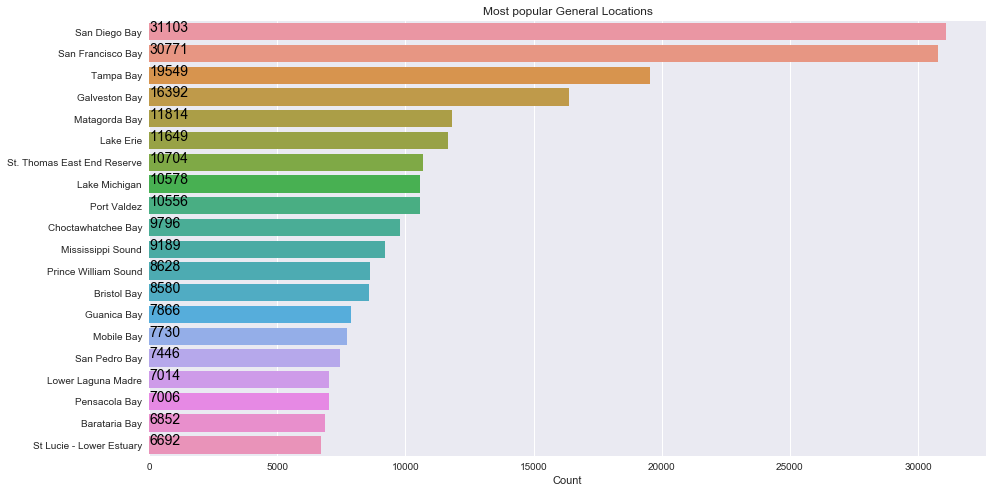

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
temp = pollutants.general_location.value_counts().head(20)
pretty_bar(temp, ax, title="Most popular General Locations", xlabel="Count")

<a id="poll_spec_loc"></a>

### [^](#toc) Specific location

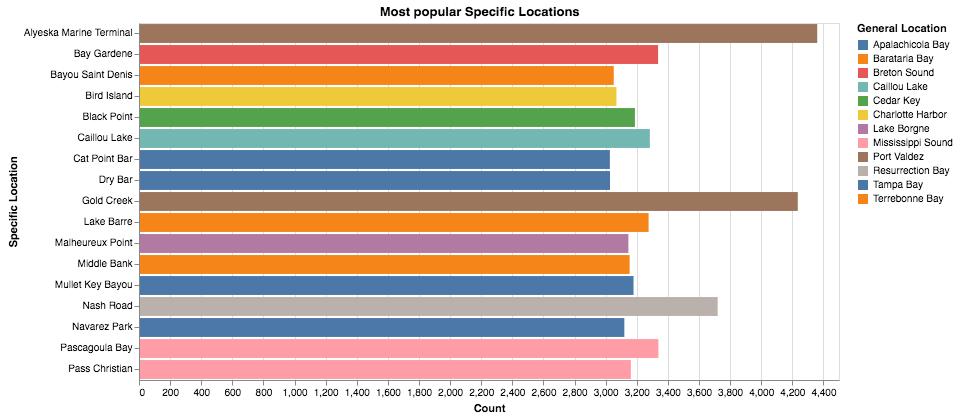

In [10]:
temp = (pollutants
        .groupby("general_location")
        .specific_location
        .value_counts()
        .rename(columns={"specific_location": "Count"})
        .sort_values(ascending=False)
        .head(17))
temp = pd.DataFrame(temp).reset_index()
temp.columns = ["General Location", "Specific Location", "Count"]

alt.Chart(temp).mark_bar().encode(
    x='Count',
    y='Specific Location',
    color="General Location",
    tooltip=['Count', "Specific Location", "General Location"]
).properties(width=700, title="Most popular Specific Locations")

<a id="poll_substances"></a>

### [^](#toc) Substances

The feature `parameter` in this dataset contains all the substances being measured.  But there's a lot!  There's <strong>524</strong> unique values!  Most of these measurements are of chemicals you've probably never heard of like "Indeno[1,2,3-c,d]pyrene" or "Dieldrin."

It's convientent then to group these chemicals into broad categories that are more understandable.  I decided to group these into PAHs, DDTs, PCBs, and Organochloride insecticides.  Some of these categories you still might not of heard of (I hadn't) so below I have a brief description of each.  I also decided to keep instances of metal or compounds (like Arsenic), but not group them together.

As a result of this grouping, around 30% of rows are dropped because they don't fit into any group.

#### PAHs

- [PAH](https://en.wikipedia.org/wiki/Polycyclic_aromatic_hydrocarbon#Human_health) - Polycyclic aromatic hydrocarbons (PAHs) are organic molecules containing only Carbon and Hydrogen.  They are known for their cyclic structure and have strong associations with tar, ash, and coal.  They tend to be linked with Cancer and toxicity.

If you would like to investigate further into these, I list all the compounds and links to there Wikipedia pages in [Appendix A](#app_a)

<strong>Technical note</strong>: Dibenzofuran is included here, but it is not actually a PAH because it contains Oxygen.  Its Wikipedia page says its not toxic although some sources disagree [[8](#8)]

#### Organochloride insectide

 - [Organochloride](https://en.wikipedia.org/wiki/Organochloride) - This group contains organic molecules with at least one Chlorine atom and who serve as insecitides.  DDTs and PCBs also fall into this category, but I'm separately them from here because of slight differences.  Specifically the moleculs listed here are either hexachlorocyclohexanes or chlorinated cyclodienes [[12](#12)].  Long exposure to these chemicals can lead to depressed central nervous system activity, followed by hyperexcitability, tremors, and then seizures.

#### DDTs

 - [DDT](https://en.wikipedia.org/wiki/DDT) - This is a special type of organochloride insectide.  Its colorless, tasteless, almost odorless, and infamous for its environmental impact.

<strong>Technical note</strong>: I am grouping [DDDs](https://en.wikipedia.org/wiki/Dichlorodiphenyldichloroethane) and [DDEs](https://en.wikipedia.org/wiki/Dichlorodiphenyldichloroethylene) with DDTs because they are so similar.  DDEs are one of the breakdown compounds of DDTs.  DDDs are slightly less toxic than DDTs

#### PCBs

 - [PCB](https://en.wikipedia.org/wiki/Polychlorinated_biphenyl) - This is another special type of Organochloride insectide.  PCBs were banned by US law in 1978 and are known for its toxicity and neurotoxicity.

<div hidden>

This dataset is so extensive!  Someone else may benefit by looking at the groups below!

### Wikipedia seems to say these aren't toxic at all, but can be the result of fossil fuels.  Tough call, but I decided to not use this group
org_sulf = {"Dibenzothiophene", "C3-Dibenzothiophenes", "C2-Dibenzothiophenes", "C1-Dibenzothiophenes",
            "Benzothiophene", "C3-Benzothiophene", "C1-Benzothiophene", "C2-Benzothiophene"}

organotin = {"Dibutyltin", "Tributyltin", "Tetrabutyltin", "Monobutyltin"}

org_phos = {"Chlorpyrifos"}

sediment = {"Clay - Chemistry Sample", "Sand - Chemistry Sample", "Silt - Chemistry Sample"}

bottom = {'Bottom Total Suspended Solids', 'Bottom Nitrite', 'Bottom Chlorophyll A', 'Bottom Silica', 'Bottom Phaeophytin', 'Bottom Nitrate', 'Bottom Total Phosphorous', 'Bottom water salinity', 'Bottom water temperature', 'Bottom water turbidity', 'Bottom water dissolved oxygen-percent', 'Bottom water dissolved oxygen-conc.', 'Bottom water specific conductance', 'Bottom Orthophosphate', 'Bottom Organic Nitrogen', 'Bottom Water Depth', 'Bottom Ammonium'}

surface = {'Surface water dissolved oxygen-percent', 'Surface water temperature', 'Surface Chlorophyll A', 'Surface Total Phosphorous', 'Surface water salinity', 'Surface Ammonium', 'Surface Phaeophytin', 'Surface Orthophosphate', 'Surface water dissolved oxygen-conc.', 'Surface water specific conductance', 'Surface Nitrite', 'Surface Water Depth', 'Surface Organic Nitrogen', 'Surface Silica', 'Surface Nitrate', 'Surface Total Suspended Solids'}

middle = {'Middle Nitrite', 'Middle Silica', 'Middle Chlorophyll A', 'Middle Phaeophytin', 'Middle water temperature', 'Middle water dissolved oxygen-conc.', 'Middle Total Phosphorous', 'Middle Nitrate', 'Middle Orthophosphate', 'Middle Water Depth', 'Middle water salinity', 'Middle Ammonium', 'Middle Total Suspended Solids', 'Middle Organic Nitrogen'}


# Note this conatins redundancies of Bottom, Surface, and Middle
total = {'Bottom Total Suspended Solids', 'Total Organic Carbon', 'Surface Total Phosphorous', 'Total Phosphorous', 'Middle Total Phosphorous', 'Bottom Total Phosphorous', 'Total Inorganic Carbon', 'Middle Total Suspended Solids', 'Surface Total Suspended Solids', 'Total Nitrogen', 'Taxa - Total}

sea_urch = {'Sea urch development - 50%pw', 'Sea urchin fert: 25% pw as % control - standard deviation','Sea urch development - 100%pw', 'Sea urchin fert: 25% pw  - standard deviation','Sea urchin fert:50% pw as % control- standard deviation', 'Sea urchin fert:50% pw - standard deviation','Sea urch development - 25%pw', 'Sea urchin fert:100% pw - standard deviation','Sea urchin fert:100% pw as % control - standard deviation', 'Sea urch fert - 25% pw','Sea urch fert as % of control - 100%pw', 'Sea urch fert as % of control - 50%pw','Sea urch fert as % of control - 25%pw', 'Sea urch fert - 100%pw', 'Sea urch fert - 50%pw','Sea Urchin Development as % of control - 100%pw', 'Sea Urchin Development as % of control - 50%pw','Sea Urchin Development as % of control - 25%pw'}

# Redundancies
temperatures = {'Surface water temperature', 'Middle water temperature', 'Bottom water temperature'}

# Redundancies
other = {"Sample dry weight", "Sample wet weight", "Sample percent dry weight", "Sample percent wet weight", "Percent lipid wet weight","Percent lipid dry weight", "Density", "Diversity", "Ampelisca Survival - mean", "Ampelisca Survival as % of Control", "Evenness"}


</div>

In [15]:
def substance_map(x):
    if x in pahs:
        return "PAH"
    elif x in ddts:
        return "DDT"
    elif x in org_chr:
        return "Organochloride insecticides"
    elif x in pcbs:
        return "PCB"
    elif x in other:
        return x
    return np.nan

other = {"Copper", "Cadmium", "Lead", "Chromium", "Zinc", "Nickel", "Silver", "Tin", "Mercury", "Selenium", 
         "Manganese", "Iron", "Aluminum", "Antimony", "Thallium", "Arsenic"}

# NOTE: I couldn't find much information on Pentachloroanisole.  It has the elements of a typical organochlorine compound
# NOTE: Endosulfan II and Endosulfan Sulfate have sulfur in it
org_chr = {"Gamma-Hexachlorocyclohexane", "Aldrin", "Mirex", "Dieldrin", "Heptachlor", "Heptachlor-Epoxide",
           "Endrin", "Oxychlordane", "Delta-Hexachlorocyclohexane", "Beta-Hexachlorocyclohexane",
           "Alpha-Hexachlorocyclohexane", "Pentachlorobenzene", "Endosulfan I", "Alpha-Chlordane",
           "Gamma-Chlordane", "Pentachloroanisole", "1,2,3,4-Tetrachlorobenzene", "Cis-Nonachlor",
           "Endosulfan II", "Endosulfan Sulfate", "1,2,4,5-Tetrachlorobenzene", "Trans-Nonachlor"}

# NOTE: Phenanthrenes_Anthracenes is here because I see articles relating it to petroleum (also it ends in -ene)
pahs = {"Benzo[a]pyrene", "Benz[a]anthracene", "Dibenzo[a,h]anthracene", "Benzo[e]pyrene", "Anthracene",
        "Fluorene", "Perylene", "Chrysene", "Fluoranthene", "Pyrene", "Acenaphthene", "Indeno[1,2,3-c,d]pyrene",
        "Benzo[g,h,i]perylene", "Phenanthrene", "Acenaphthylene", "Benzo[b]fluoranthene", "Naphthalene",
        "Hexachlorobenzene", "Benzo[k]fluoranthene", "C1-Naphthalenes", "C2-Naphthalenes",
        "C3-Naphthalenes", "C4-Naphthalenes", "C4-Chrysenes", "C3-Chrysenes", "C1-Chrysenes",
        "C2-Chrysenes", "C1-Fluorenes", "C2-Fluorenes", "C3-Fluorenes", "1-Methylnaphthalene",
        "2-Methylnaphthalene", "1-Methylphenanthrene", "C3-Phenanthrenes_Anthracenes",
        "C4-Phenanthrenes_Anthracenes", "C2-Phenanthrenes_Anthracenes", "C1-Phenanthrenes_Anthracenes",
        "2,6-Dimethylnaphthalene", "1,6,7-Trimethylnaphthalene", "C3-Fluoranthenes_Pyrenes",
        "C2-Fluoranthenes_Pyrenes", "Dibenzofuran", "Naphthobenzothiophene",
        "C3-Naphthobenzothiophene", "C2-Naphthobenzothiophene", "C1-Naphthobenzothiophene",
        "C2-Decalin", "C1-Decalin", "C4-Decalin", "C3-Decalin", "Decalin",
        "C1-Fluoranthenes_Pyrenes"}

pcbs = {"PCB195_208", "PCB66", "PCB128", "PCB105", "PCB206", "PCB44", "PCB101_90", "PCB180",
        "PCB138_160", "PCB8_5", "PCB153_132_168", "PCB18", "PCB170_190", "PCB52", "PCB28",
        "PCB187", "PCB118", "PCB209", "PCB201_173_157", "PCB149_123", "PCB31", "PCB49",
        "PCB110_77", "PCB29", "PCB70", "PCB158", "PCB156_171_202", "PCB183", "PCB194",
        "PCB151", "PCB174", "PCB95", "PCB99", "PCB87_115", 'PCB169', 'PCB 126', 'PCB56_60',
        'PCB45', 'PCB 104', 'PCB188', 'PCB146', 'PCB74_61', 'PCB77', 'PCB 154', 'PCB112',
        'PCB126', 'PCB', 'PCB18_17', 'PCB199'}

ddts = {"4,4'-DDT", "2,4'-DDT", "4,4'-DDD", "2,4'-DDD", "2,4'-DDE", "4,4'-DDE"}

pollutants["substance"] = pollutants.parameter.map(substance_map)
pollutants = pollutants.drop(pollutants[pollutants.substance.isnull()].index, axis=0)

<a id="poll_organisms"></a>

### [^](#toc) Organisms

There is so much data in this dataset!  There are over recorded in this dataset.  Much like the substances, I'm going to group organisms together.

I grouped most of the organisms into these categories: Bivalves, Fish, 1st prey (FIXME: better name ???) (plankton, bacteria), and Sediment.  Biologist warn of harmful chemicals acculumating from one organism to the next [FIXME: citation needed].  Each of the (1st prey) has a tiny amount of harmful chemicals, however.

There are specific examples below of the different groups and their most popular species.

<div hidden>

conch    = {"Strombus gigas"}

</div>

#### Bivalves

- [Bivalves](https://en.wikipedia.org/wiki/Bivalvia) - Organisms (specifically mulluscs) that are enclosed by two shells attached at a hinge.

#### Bivalves - Oysters

 - One of the most common species of oyster in this dataset is Crassostrea virginica or the [Eastern oyster](https://en.wikipedia.org/wiki/Eastern_oyster).

<img alt="Eastern Oyster" style="height:300px; float:left" src="https://www.sherpaguides.com/georgia/barrier_islands/images/oyster.jpg"/>

#### Bivalves - Mussel

[Mytilus edulis](https://en.wikipedia.org/wiki/Blue_mussel) (left) also known as the "blue mussel" or "common mussel" and [Dreissena](https://en.wikipedia.org/wiki/Dreissena) (right) are both species of the hard shelled <strong>mussel</strong> group!

<img style="height:300px; float:left" alt="Mytilus edulis" src="https://upload.wikimedia.org/wikipedia/commons/3/32/Blue_mussel_Mytilus_edulis.jpg"/>
<img style="height:300px; float:right" alt="Dreissena" src="https://nas.er.usgs.gov/taxgroup/mollusks/images/zebra4b.jpg"/>

#### Bivalves - Clam

[Clinocardium nuttallii](https://en.wikipedia.org/wiki/Clinocardium_nuttallii) is a type of clam native to the coastlines of California and the Pacific Northwest

<img style="width:300px; float:left" src="http://www.centralcoastbiodiversity.org/uploads/1/4/9/9/14993002/3934812_orig.jpg"/>

### Fish

Below are some example of the fish that are covered in this dataset...

---

[Lutjanus griseus](https://en.wikipedia.org/wiki/Mangrove_snapper) (also know as the Mangrove snapper)

<img style="width:300px; float:left" src="https://upload.wikimedia.org/wikipedia/commons/6/6b/Grey_snapper_-_Lutjanus_griseus.jpg"/>

[Pleuronectes americanus](https://en.wikipedia.org/wiki/Winter_flounder) is the winter flounder

<img style="width:300px; float:left" src="http://brick.shorebeat.com/wp-content/uploads/2015/03/winter_flounder.jpg"/>

[Diapterus auratus](https://en.wikipedia.org/wiki/Diapterus) is a type of fish appearing on both coasts of the Americas

<img style="width:300px; float:left" src="http://www.fishesoftexas.org/media/attachments/taxa/images/web/9121.jpg"/>

In [7]:
def organism_map(x):
    if x in sediment:
        return "Sediment"
    elif x in bivalves:
        return "Bivalves"
    elif x in fish:
        return "Fish"
    return np.nan

### Bivalves
oysters  = {"Crassostrea virginica", "Ostrea sandvicensis", "Crassostrea rhizophorae",
           "Isognomon alatus", "Crassostrea corteziensis"}

clams    = {"Clinocardium nuttallii", "Mya Arenaria", "Anadara tuberculosa",
           "Protothaca staminea", "Anadara similis", "mytella guyanensis",
           "Donax denticulatus", "Siliqua Patula", "Corbicula fluminea",
           "Protothaca grata", "Mytella falcata", "Ctenoides scabra", "Chama sinuosa"}

mussels  = {"Mytilus species", "Mytilus edulis", "Dreissena", "Perumytilus purpuratus",
           "Aulacomya ater", "Perna Perna", "Semimytilus algosus", "Mytilus platensis",
           "Bracchidonies rodrigezii", "Choromytilus chorus", "Geukensia demissa"}


### Fish
flounder = {"Pleuronectes americanus", "Platichthys stellatus", "Flatfish"}

fish     = {"Lutjanus griseus", "Diapterus auratus", "Osmerus mordax",
            "Diplodus argenteus", "Hexagrammos decagrammus", "Shrimp", "Starfish"}

salmon   = {"Oncorhynchus keta", "Oncorhynchus nerka"}

misc     = {"Ampelisca abdita", "Vibrio fischeri",
           "Eohaustorius estuarius", "Panulirus argus"}

### Sediment          
sediment = {"Sediment", "Surface Sediment"}
            

# maybe coral? and urchin?
bivalves  = set.union(oysters, clams, mussels)

fish      = set.union(flounder, fish, salmon)

pollutants["organism"] = pollutants.scientific_name.map(organism_map)
pollutants = pollutants.drop(pollutants[pollutants.organism.isnull()].index, axis=0)

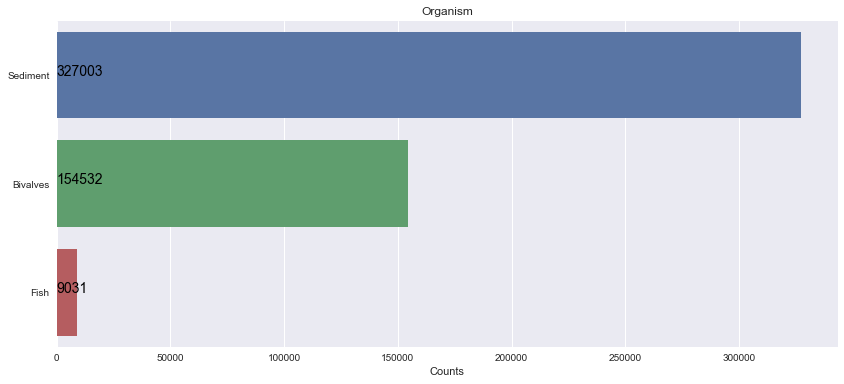

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))

pretty_bar(pollutants.organism.value_counts().head(17), ax, title="Organism", xlabel="Counts")

<a id="poll_result"></a>

### [^](#toc) Result

After all that work, we have the satisfaction of seeing the Mussel Watch results.  The plot below shows the median  levels of each substance measured in that organism.

It'd be nice to know what are safe levels for each substance.  While I wasn't able to find US Government recommended levels for seafood, I was able to find recommended safe levels for other items.  The government puts safe levels at:

- Lead - 50 ng/g [[9](#9)]
- Arsenic - around 160 ng/g (technically 100 parts per billion) [[10](#10)]
- PAHs - around 0.2 ng/g [[11](#11)].

The PAH levels seem a lot lower than what we see here, but that particular level was set for water, a substance every drinks everday.  The level might be so low for that reason.

#### All the results are given in nanograms per dry gram.  One gram is equal to 10^9 nanograms

In [9]:
### Convert all units to the same unit
is_mg = pollutants.units.map(lambda x: 999 * int(x == "micrograms per dry gram") + 1)
pollutants.result = pollutants.result * is_mg
pollutants.units = pollutants.units.map(lambda x: "ng/dry g" if x == "micrograms per dry gram" else x)

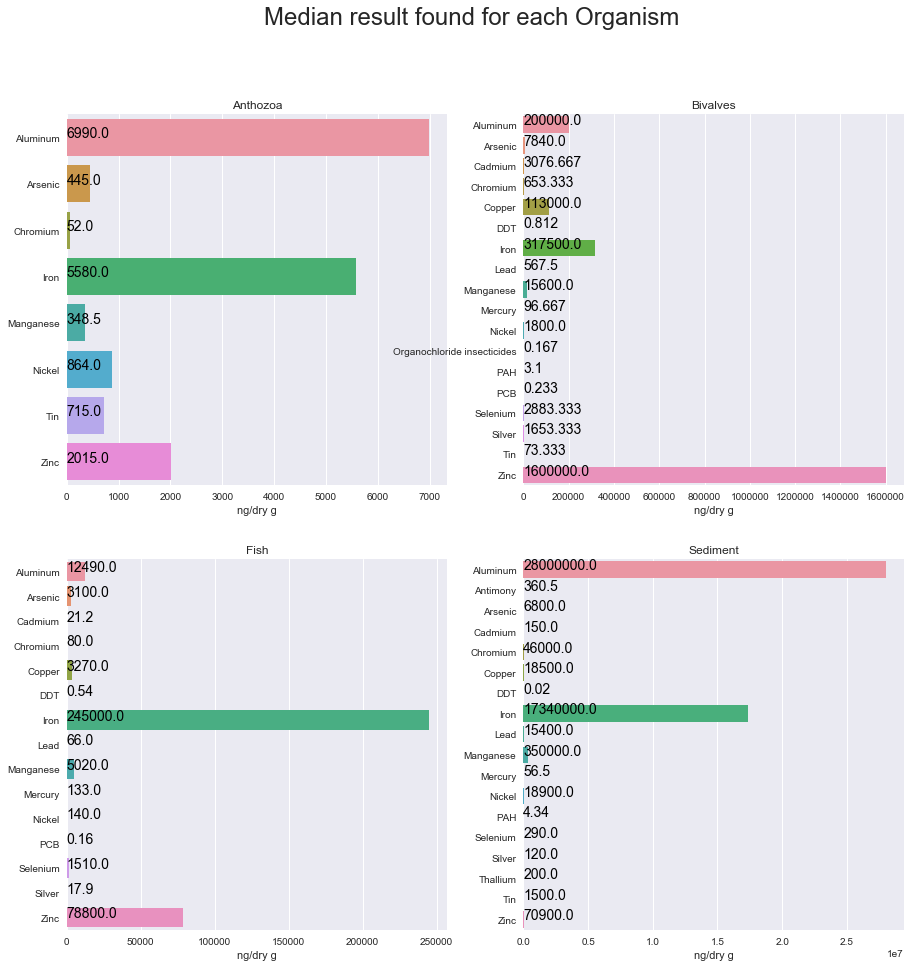

In [61]:
fig, axarr = plt.subplots(2, 2, figsize=(15, 15))

### Find the median result
temp = pd.DataFrame(pollutants.groupby(["general_name", "simple_params"])["result"].median())
temp = temp[temp.result > 0].reset_index().groupby("general_name")

plt.suptitle("Median result found for each Organism", fontsize=24)
i = 0
for organism, group in temp:
    ax = axarr[i//2][i%2]
    pretty_bar(None, x=group["result"], y=group["simple_params"], ax=ax, title=organism, ylabel="", xlabel="ng/dry g")
    i += 1

---
<a name="histopaths"></a>

# [^](#toc) <u>Histopaths</u>

There appears to be a lot of columns so let's figure out the important ones

In [157]:
histopaths = pd.read_csv(DATA_PATH + "histopaths.csv")
print(f"Shape of histopaths data: {color.BOLD}{histopaths.shape}{color.END}")

Shape of histopaths data: (1800, 79)


<a id="hist_process"></a>

### [^](#toc) Data Processsing

    
This dataset contains a lot of features that don't really contain any inforamtion, so I'll delete them

In [158]:
### Interestingly, there are several columns that are completely empty!
### These features are: 
cols = ["edema", "gonad_subsample_wet_weight", "hydra_gill",
        "nemertine_gill", "other_trematode_sporocyst_gill",
        "other_trematode_sporocyst_gut", "tumor"]

### In addition there are also many columns that only have 10 entries present!
### These features are:
cols.extend(["abnormality", "abnormality_description", "chlamydia", 
        "metacercaria", "pseudoklossia", 
        "rickettsia_digestive_tubule", "rickettsia_gut"])

### There are also some columns that are boring and contain only one unique value.
### These should be removed as well
cols.extend(["multinucleated_sphere_x",
             "pea_crab", "proctoeces", "neoplasm",
             "unusual_digestive_tubule", "unidentified_gonoduct_organism",
             "station_letter", "multinucleated_sphere_x_description",
             "focal_necrosis", "diffuse_necrosis"])

### Columns lacking information
cols.extend(["unidentified_organism", "focal_inflammation", 
             "diffuse_inflammation", "trematode_metacercariae_description", 
             "condition_code"])

histopaths = histopaths.drop(cols, axis=1)

<a id="hist_overview"></a>

### [^](#toc) Quick Overview

In [159]:
num_cols = [col for col in histopaths.columns if histopaths[col].dtype != object]
cat_cols = [col for col in histopaths.columns if histopaths[col].dtype == object]

print(f"\n{color.UNDERLINE}Numeric columns:{color.END}")
print(" --- ".join(num_cols))

print(f"\n{color.UNDERLINE}Categoric columns:{color.END}")
print(" --- ".join(cat_cols))

histopaths.head()


Numeric columns:
bucephalus --- ceroid --- cestode_body --- cestode_gill --- cestode_mantle --- ciliate_digestive_tract --- ciliate_gut --- ciliate_large_gill --- ciliate_small_gill --- copepod_body --- copepod_gill --- copepod_gut_digestive_tubule --- dermo_numerical_value --- digestive_tubule_atrophy --- empty_displacement_volume --- fiscal_year --- full_displacement_volume --- latitude --- length --- longitude --- nematode --- nematopsis_body --- nematopsis_gill --- nematopsis_mantle --- protozoan_digestive_tubule --- protozoan_gut --- sample_number --- trematode_metacercariae --- wet_weight --- xenoma

Categoric columns:
coastal_ecological_area --- condition_code_description --- dermo --- dermo_description --- dermo_infection_intensity --- digestive_tubule_atrophy_description --- general_location --- gonadal_index --- gonadal_index_description --- nst_sample_id --- nst_site --- region --- sample_letter --- sex --- source_file --- species_name --- specific_location --- specific_reg

bucephalus  ceroid  cestode_body  cestode_gill  cestode_mantle  \
0         0.0     0.0           NaN           NaN             NaN   
1         0.0     0.0           NaN           NaN             NaN   
2         0.0     0.0           NaN           NaN             NaN   
3         0.0     0.0           NaN           NaN             NaN   
4         0.0     0.0           NaN           NaN             NaN   

   ciliate_digestive_tract  ciliate_gut  ciliate_large_gill  \
0                      0.0          0.0                 0.0   
1                      0.0          0.0                 0.0   
2                      0.0          0.0                 0.0   
3                      0.0          0.0                 0.0   
4                      0.0          0.0                 0.0   

   ciliate_small_gill            coastal_ecological_area  \
0                 0.0  Alaska South Central - Cook Inlet   
1                 0.0  Alaska South Central - Cook Inlet   
2                 7.0  Alaska South Central - Cook Inlet   
3                 0.0  Alaska South Central - Cook Inlet   
4                 0.0  Alaska South Central - Cook Inlet   

  condition_code_description  copepod_body  copepod_gill  \
0                        NaN           0.0           0.0   
1                        NaN           0.0           0.0   
2                        NaN           0.0           0.0   
3                        NaN           0.0           0.0   
4                        NaN           0.0           0.0   

   copepod_gut_digestive_tubule dermo dermo_description  \
0                           0.0   NaN               NaN   
1                           0.0   NaN               NaN   
2                           0.0   NaN               NaN   
3                           0.0   NaN               NaN   
4                           0.0   NaN               NaN   

  dermo_infection_intensity  dermo_numerical_value  digestive_tubule_atrophy  \
0                       NaN                    NaN                       1.0   
1                       NaN                    NaN                       1.0   
2                       NaN                    NaN                       2.0   
3                       NaN                    NaN                       1.0   
4                       NaN                    NaN                       2.0   

                digestive_tubule_atrophy_description  \
0  Average wall thickness less than normal but gr...   
1  Average wall thickness less than normal but gr...   
2  Wall thickness averaging about one-half as thi...   
3  Average wall thickness less than normal but gr...   
4  Wall thickness averaging about one-half as thi...   

   empty_displacement_volume  fiscal_year  full_displacement_volume  \
0                        NaN         2009                       NaN   
1                        NaN         2009                       NaN   
2                        NaN         2009                       NaN   
3                        NaN         2009                       NaN   
4                        NaN         2009                       NaN   

  general_location gonadal_index gonadal_index_description  latitude  length  \
0       Cook Inlet            S3    Gonad about half empty  59.20715     3.9   
1       Cook Inlet            S3    Gonad about half empty  59.20715     3.6   
2       Cook Inlet            R0                  Inactive  59.20715     3.7   
3       Cook Inlet            R0                  Inactive  59.20715     3.5   
4       Cook Inlet            S3    Gonad about half empty  59.20715     3.4   

   longitude  nematode  nematopsis_body  nematopsis_gill  nematopsis_mantle  \
0   -151.815       NaN              0.0              0.0                0.0   
1   -151.815       NaN              0.0              0.0                0.0   
2   -151.815       NaN              0.0              0.0                0.0   
3   -151.815       NaN              0.0              0.0                0.0   
4   -151.81

<a id="hist_nan"></a>

### [^](#toc) Missing values

In [24]:
missing_cols = histopaths.isnull().sum()
missing_cols = histopaths[missing_cols[missing_cols > 0].index].isnull().sum()
missing_cols = missing_cols.reset_index()
missing_cols.columns = ["Column", "Num missing"]

missing_cols

Column  Num missing
0                             bucephalus         1382
1                                 ceroid          467
2                           cestode_body         1392
3                           cestode_gill         1392
4                         cestode_mantle         1392
5                ciliate_digestive_tract         1382
6                            ciliate_gut         1382
7                     ciliate_small_gill         1382
8                         condition_code          925
9             condition_code_description          925
10                          copepod_body         1382
11                          copepod_gill         1382
12          copepod_gut_digestive_tubule         1382
13                                 dermo          925
14                     dermo_description          925
15             dermo_infection_intensity          925
16                 dermo_numerical_value          925
17                  diffuse_inflammation          467
18                      diffuse_necrosis          467
19              digestive_tubule_atrophy          467
20  digestive_tubule_atrophy_description          467
21             empty_displacement_volume          925
22                    focal_inflammation         1382
23                        focal_necrosis          467
24              full_displacement_volume          925
25                         gonadal_index          467
26                              nematode          477
27                       nematopsis_body         1385
28                       nematopsis_gill         1384
29                     nematopsis_mantle         1382
30            protozoan_digestive_tubule         1392
31                         protozoan_gut         1392
32                         sample_letter          885
33                          species_name          885
34               trematode_metacercariae          467
35   trematode_metacercariae_description          468
36                 unidentified_organism          467
37                            wet_weight          320
38                                xenoma         1382

<a id="hist_gen_feats"></a>

### [^](#toc) General features

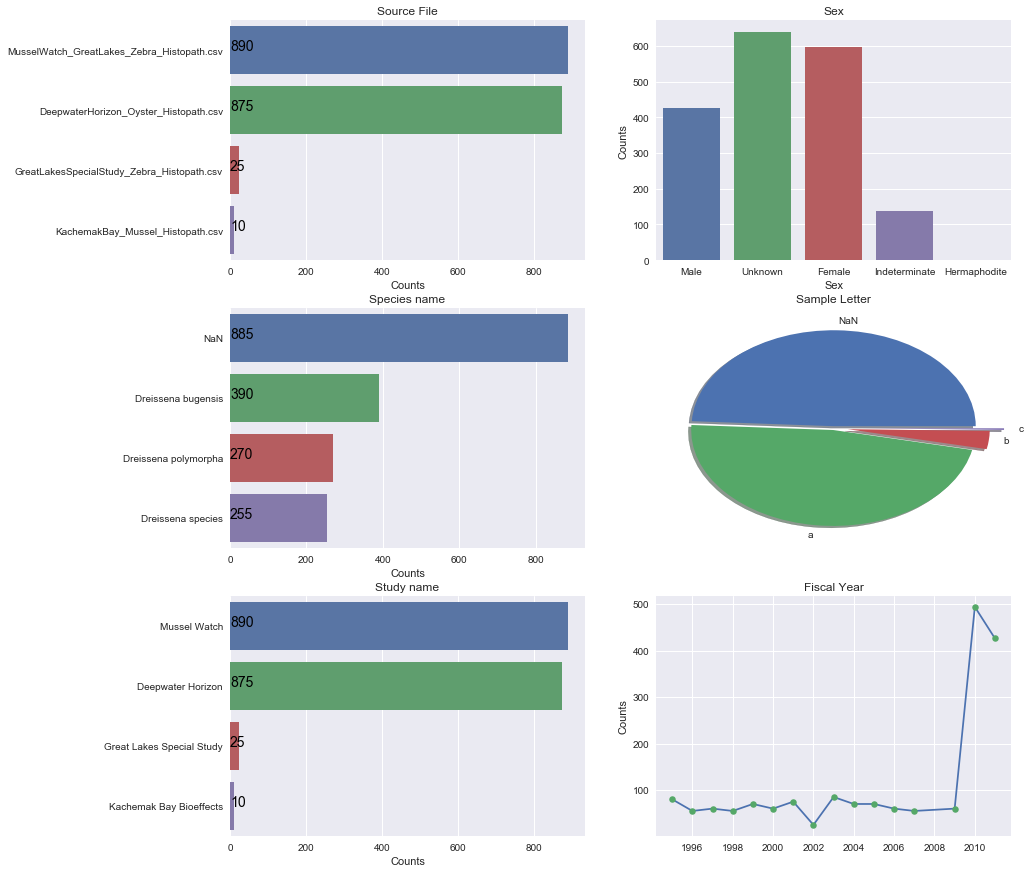

In [25]:
fig, axarr = plt.subplots(3, 2, figsize=(14, 15))

for col in ("source_file", "sex", "species_name",
            "sample_letter", "study_name"):
    histopaths[col].fillna("NaN", inplace=True)

### source_file
pretty_bar(histopaths.source_file.value_counts(), axarr[0][0],
           title="Source File", xlabel="Counts")

### sex
sns.countplot(histopaths.sex, ax=axarr[0][1]).set(title="Sex", xlabel="Sex", ylabel="Counts")

### species_name
pretty_bar(histopaths.species_name.value_counts(), axarr[1][0],
           title="Species name", xlabel="Counts")

### sample_letter
explode = [0.02, 0.02, 0.1, 0.2]
(histopaths.sample_letter
     .value_counts()
     .plot(kind="pie", ax=axarr[1][1], explode=explode, shadow=True)
     .set(ylabel="", title="Sample Letter"))

### study_name
pretty_bar(histopaths.study_name.value_counts(), axarr[2][0],
           title="Study name", xlabel="Counts")

axarr[2][1].plot(histopaths.fiscal_year.value_counts().sort_index())
axarr[2][1].plot(histopaths.fiscal_year.value_counts().sort_index(), ".", markersize=13)
axarr[2][1].set_title("Fiscal Year")
axarr[2][1].set_ylabel("Counts");

<a id="hist_loc"></a>

### [^](#toc) Location

#### Location Wordcloud

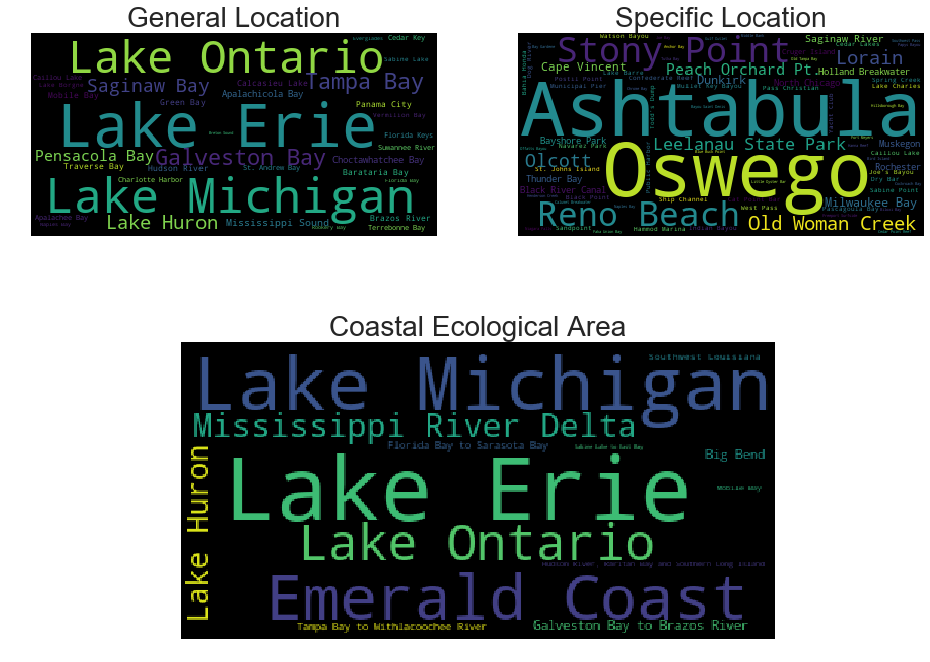

In [165]:
plt.figure(figsize=(16, 12))

### Nuanced way of creating subplots
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

for ax, col, title in [(ax1, "general_location",        "General Location"),
                       (ax2, "specific_location",       "Specific Location"),
                       (ax3, "coastal_ecological_area", "Coastal Ecological Area")]:
    text = histopaths[col].value_counts()
    
    wc = WordCloud().generate_from_frequencies(text)
    ax.imshow(wc)
    ax.axis('off')
    ax.set_title(title, fontsize=28)

#### Most popular regions

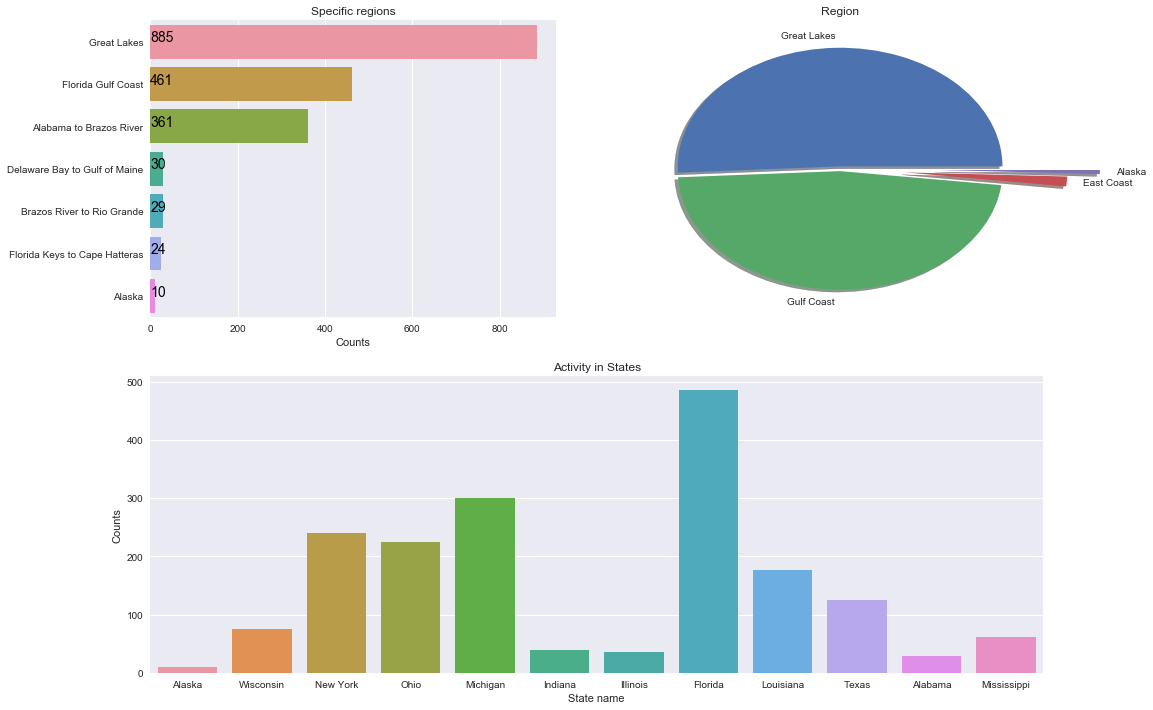

In [104]:
plt.figure(figsize=(16, 12))

### Nuanced way of creating subplots
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax2 = plt.subplot2grid((2, 2), (0, 1))
ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

### specific_region
pretty_bar(histopaths.specific_region.value_counts(), ax1,
           xlabel="Counts", title="Specific regions")

### region
explode = [0.02, 0.02, 0.4, 0.6]
(histopaths.region
 .value_counts()
 .plot(kind="pie", ax=ax2, explode=explode, shadow=True)
 .set(ylabel="", title="Region"))

### state_name
(sns.countplot(histopaths.state_name, ax=ax3)
    .set(title="Activity in States", xlabel="State name", ylabel="Counts"));

<a id="hist_nst_site"></a>

### [^](#toc) Map of sites

Shown are all the NST Sites.  The dataset defines these as: "a character code that defines the NS&T sampling site name. Codes are generally defined by the site's general and specific location" [[5](#5)].

In [80]:
# Too many markers excedes the data limit
# FIXME: The data limit on Kaggle Kernels is probably different
NUM_MARKERS = 1000

m = folium.Map(location=[60, -125], zoom_start=3)
marker_cluster = MarkerCluster().add_to(m)

for lat, lon, nst_site in histopaths[["latitude", "longitude", "nst_site"]].values:    
    folium.Marker(
        location = [lat, lon],
        popup = nst_site,
        icon = folium.Icon(color='green', icon='ok-sign'),
    ).add_to(marker_cluster)
    
    if NUM_MARKERS == 1:
        break
    NUM_MARKERS -= 1

m

<a id="hist_gonadal"></a>

### [^](#toc) Gonadal

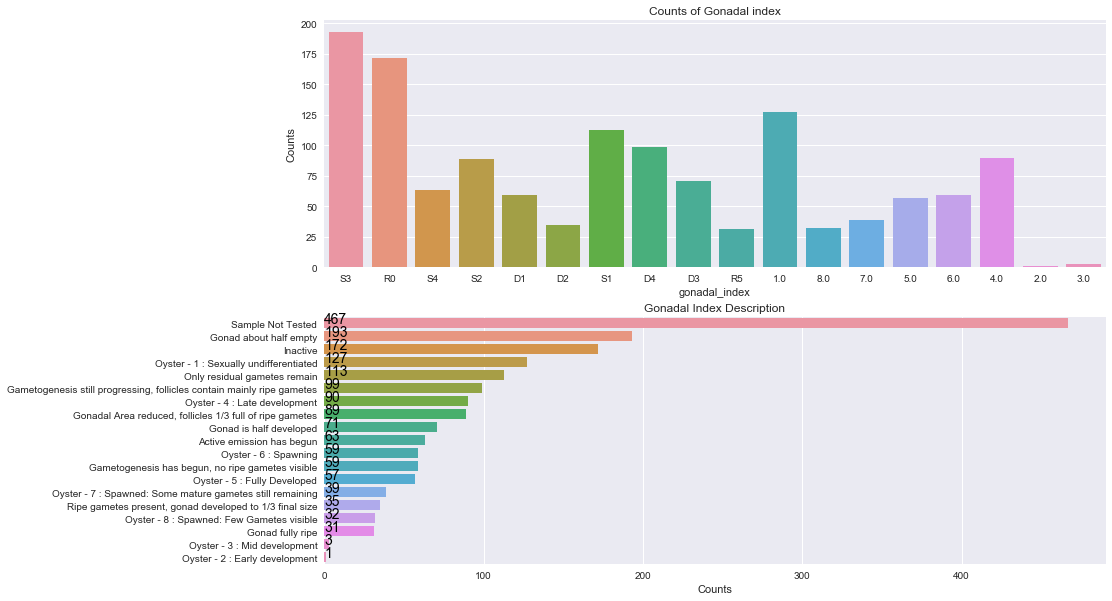

In [84]:
fig, axarr = plt.subplots(2, 1, figsize=(14, 10))

### dermo
(sns.countplot(histopaths.gonadal_index, ax=axarr[0])
     .set(title="Counts of Gonadal index", ylabel="Counts"))

### dermo_description
pretty_bar(histopaths.gonadal_index_description.value_counts(), axarr[1],
           title="Gonadal Index Description", xlabel="Counts")

<a id="hist_dermo"></a>

### [^](#toc) Dermo

<div hidden>
FIXME: add "dermo_numerical_value"
</div>

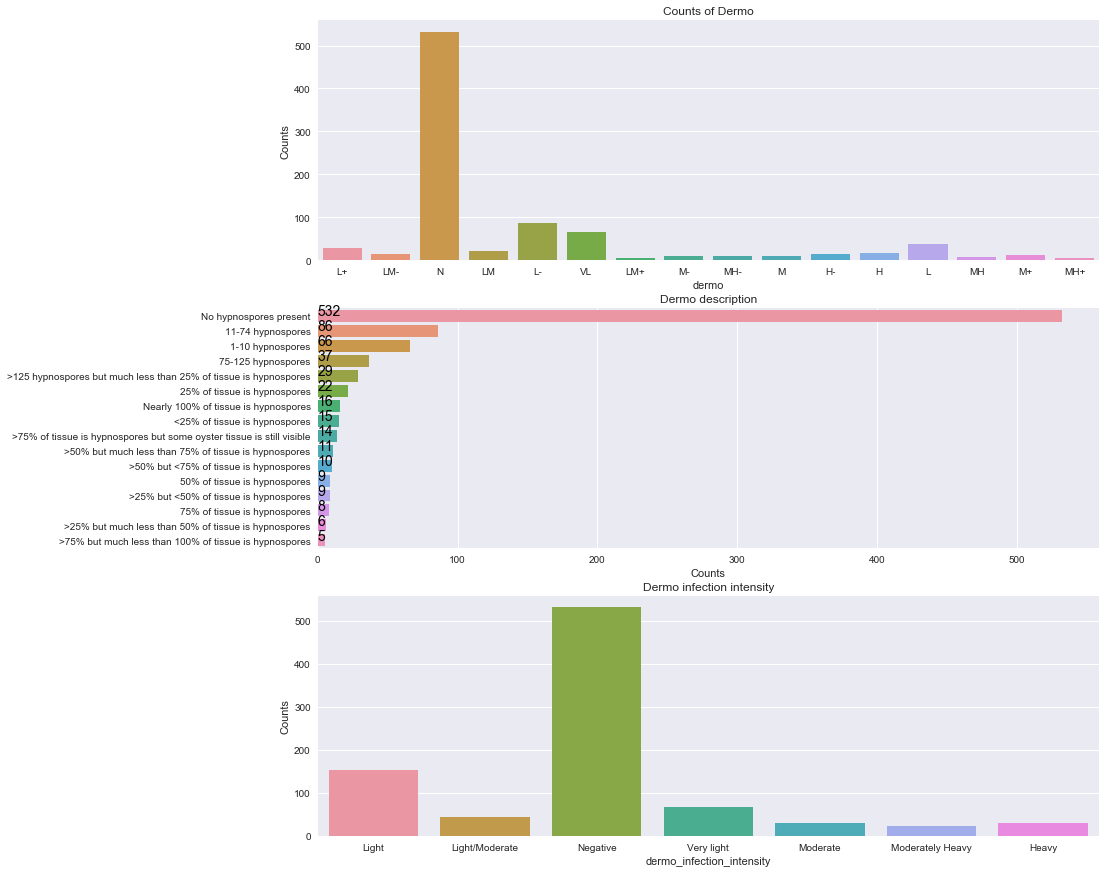

In [163]:
fig, axarr = plt.subplots(3, 1, figsize=(14, 15))

### dermo
(sns.countplot(histopaths.dermo, ax=axarr[0])
     .set(title="Counts of Dermo", ylabel="Counts"))

### dermo_description
pretty_bar(histopaths.dermo_description.value_counts(), axarr[1],
           title="Dermo description", xlabel="Counts")

### dermo_infection_intensity
(sns.countplot(histopaths.dermo_infection_intensity, ax=axarr[2])
     .set(title="Dermo infection intensity", ylabel="Counts"));

### Subject description

The observer is looking at both the Condition Code and the Digestive Tubule Atrophy

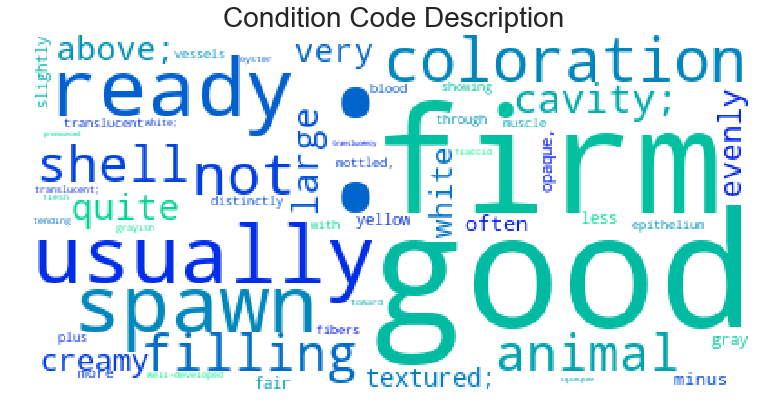

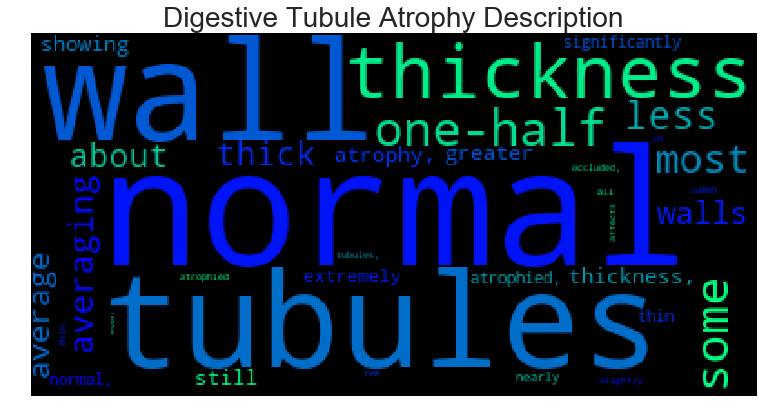

In [178]:
def remove_stopwords(text, stopwords):
    for word in stopwords:
        text = text.replace(" " + word + " ", " ")
    return text

stopwords = ["and", "but", "to", "or", "as", "the", "then", "than", "of"]

### condition_code_description
histopaths['condition_code_description'].fillna("", inplace=True)
text = " ".join(histopaths['condition_code_description']).lower()
text = remove_stopwords(text, stopwords)
freq = Counter(text.split())
wc = WordCloud(colormap='winter_r', background_color='White').generate_from_frequencies(freq)
plt.figure(figsize=(13,13))
plt.imshow(wc)
plt.axis('off')
plt.title('Condition Code Description', fontsize=28)

### digestive_tubule_atrophy_description
histopaths['digestive_tubule_atrophy_description'].fillna("", inplace=True)
text = " ".join(histopaths['digestive_tubule_atrophy_description']).lower()
text = remove_stopwords(text, stopwords)
freq = Counter(text.split())
wc = WordCloud(colormap='winter_r', background_color='Black').generate_from_frequencies(freq)
plt.figure(figsize=(13,13))
plt.imshow(wc)
plt.axis('off')
plt.title('Digestive Tubule Atrophy Description', fontsize=28);

<a id="hist_corr"></a>

### [^](#toc) Correlation plot

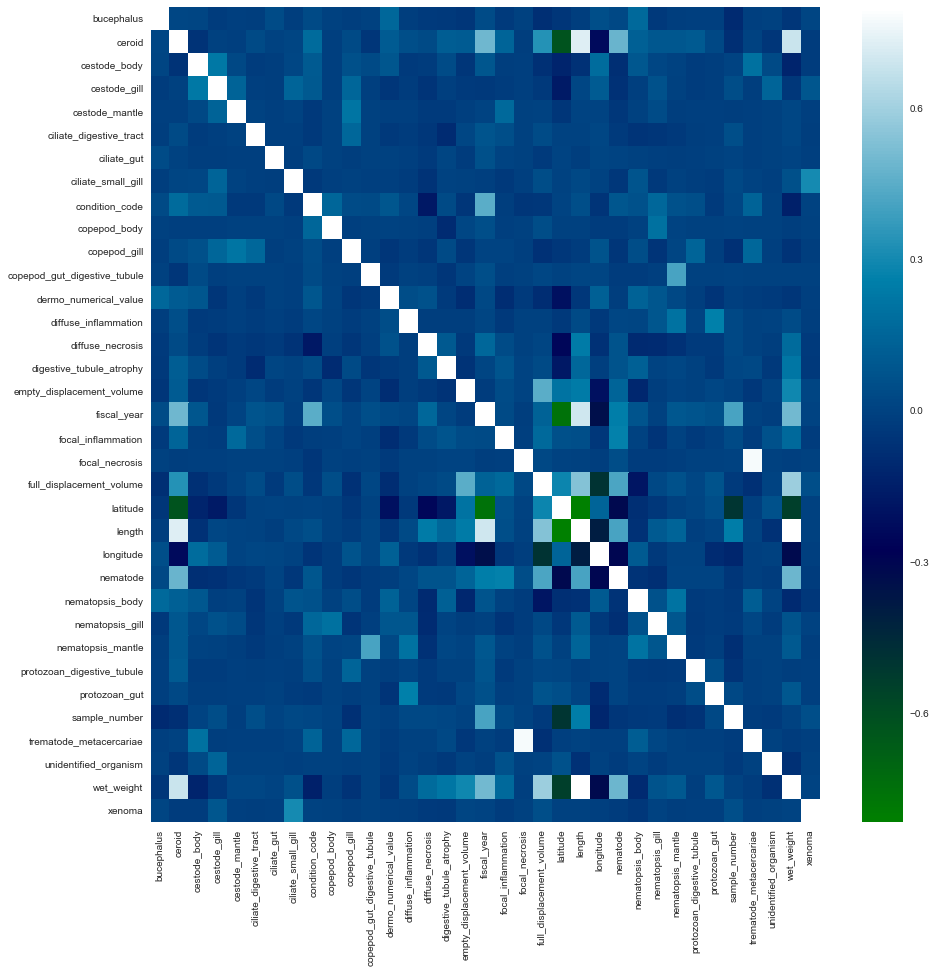

In [71]:
f, ax = plt.subplots(figsize=(15, 15))

_ = sns.heatmap(histopaths.corr(), vmax=.8, cmap="ocean")

### Cestode

[Cestode](https://en.wikipedia.org/wiki/Cestoda) are a type of parasitic worm commonly known as tapeworms.  Roughly the life cycle is: eggs enter an intermediate host like fish or crustacean until a bigger organism (like a human) eats the intermediate host.  The worm then enters the new host and shares its food.

<img alt="cestode anatomy" style="height:250px; float:left" src="https://classconnection.s3.amazonaws.com/818/flashcards/2373818/jpg/eucestode_anatomy_21354663239892.jpg"/>

<img alt="cestode in fish" style="height:250px; float:left" src="http://2.bp.blogspot.com/-_OEtk4upo7A/U2PxzoV63AI/AAAAAAAAB50/JFwk3aqGLnw/s1600/cestode_muscle.png"/>

### Ciliate

[Ciliates](https://en.wikipedia.org/wiki/Ciliate) are a group of single-celled eukaryotes with hair-like organelles.  They can be found in most water-based environments and range in size from 20 micrometers to 4 millimeters.

<img alt="Ciliate" style="width:300px; float:left" src="http://www.microscopy-uk.org.uk/micropolitan/fresh/ciliate/Paramecium_feeding.jpg"/>

### Copepod

[Copepod](https://en.wikipedia.org/wiki/Copepod) are small crustaceans that can be seen in almost all freshwater environments.  Many Copepods are parasites and feed off of their hosts.  Interestingly, these parasites can serve as hosts for other parasites.

<img alt="Copepod" style="width:300px; float:left" src="https://cdn.britannica.com/700x450/20/12720-004-3F05363F.jpg"/>

### Nemotopsis

[Nemotopsis](https://microbewiki.kenyon.edu/index.php/Nematopsis) are a type of eukaryotic parasite that targets bivalves and crustaceans.  Unfortunately, I could not find any photos of it.

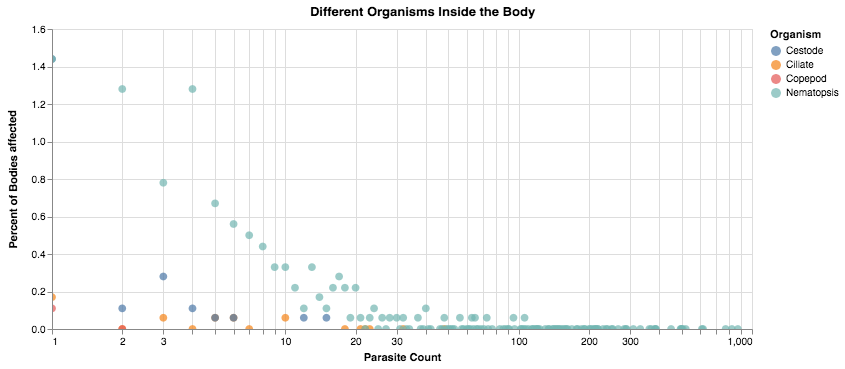

In [378]:
### I assume if a values NaN, it means none showed up
cols = ["ciliate_large_gill", "ciliate_small_gill", "ciliate_gut",
        "cestode_gill", "cestode_body", "cestode_mantle",
        "nematopsis_gill", "nematopsis_body", "nematopsis_mantle",
        "copepod_gill", "copepod_body", "copepod_gut_digestive_tubule"]
histopaths[cols] = histopaths[cols].fillna(0)

# Ciliate
s1 = (histopaths.ciliate_large_gill + histopaths.ciliate_small_gill).value_counts().reset_index()
s2 = histopaths.ciliate_gut.value_counts().reset_index()
s3 = pd.DataFrame({"Mantle": [len(histopaths)], "index": [0]})
df1 = s1.merge(s2, how="outer", on="index")
df1 = df1.merge(s3, how="outer", on="index")
df1.columns = ["Parasite Count", "Percent of Gills affected", "Percent of Bodies affected", "Percent of Mantles affected"]

# Cestode
s1 = histopaths.cestode_gill.value_counts().reset_index()
s2 = histopaths.cestode_body.value_counts().reset_index()
s3 = histopaths.cestode_mantle.value_counts().reset_index()
df2 = s1.merge(s2, how="outer", on="index")
df2 = df2.merge(s3, how="outer", on="index")
df2.columns = ["Parasite Count", "Percent of Gills affected", "Percent of Bodies affected", "Percent of Mantles affected"]

# Nemotopsis
s1 = histopaths.nematopsis_gill.value_counts().reset_index()
s2 = histopaths.nematopsis_body.value_counts().reset_index()
s3 = histopaths.nematopsis_mantle.value_counts().reset_index()
df3 = s1.merge(s2, how="outer", on="index")
df3 = df3.merge(s3, how="outer", on="index")
df3.columns = ["Parasite Count", "Percent of Gills affected", "Percent of Bodies affected", "Percent of Mantles affected"]

# Nemotopsis
s1 = histopaths.copepod_gill.value_counts().reset_index()
s2 = (histopaths.copepod_body + histopaths.copepod_gut_digestive_tubule).value_counts().reset_index()
s3 = pd.DataFrame({"Mantle": [len(histopaths)], "index": [0]})
df4 = s1.merge(s2, how="outer", on="index")
df4 = df4.merge(s3, how="outer", on="index")
df4.columns = ["Parasite Count", "Percent of Gills affected", "Percent of Bodies affected", "Percent of Mantles affected"]


df1["Organism"] = ["Ciliate"]    * len(df1)
df2["Organism"] = ["Cestode"]    * len(df2)
df3["Organism"] = ["Nematopsis"] * len(df3)
df4["Organism"] = ["Copepod"]    * len(df4)
df1 = df1.merge(df2, how="outer")
df3 = df3.merge(df4, how="outer")
df  = df1.merge(df3, how="outer")

cols = ["Percent of Gills affected", "Percent of Bodies affected", "Percent of Mantles affected"]
df[cols] = (100 * df[cols] / len(histopaths)).round(decimals=2)
df.fillna(0, inplace=True)
df.drop(df[df["Parasite Count"] == 0].index, inplace=True)

### Plotting - Gills
click = alt.selection_multi(fields=['Organism'])

chart = alt.Chart(df).mark_circle(size=60).encode(
    alt.X('Parasite Count:Q',
        scale=alt.Scale(type="log")
    ),
    y='Percent of Gills affected',
    color=alt.condition(click,'Organism', alt.value('lightgray')),
    tooltip=['Organism', "Parasite Count", "Percent of Gills affected"]
).properties(selection=click, width=700, title="Different Organisms Inside the Gill")

chart.interactive()

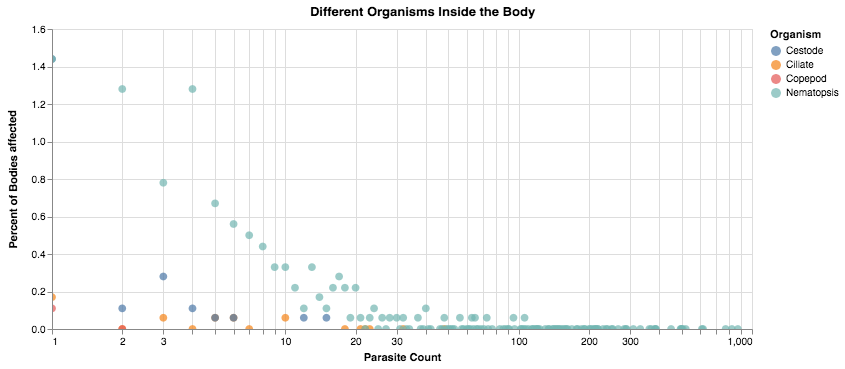

In [381]:
### Plotting - Bodies
click = alt.selection_multi(fields=['Organism'])

chart = alt.Chart(df).mark_circle(size=60).encode(
    alt.X('Parasite Count:Q',
        scale=alt.Scale(type="log")
    ),
    y='Percent of Bodies affected',
    color=alt.condition(click,'Organism', alt.value('lightgray')),
    tooltip=['Organism', "Parasite Count", "Percent of Bodies affected"]
).properties(selection=click, width=700, title="Different Organisms Inside the Body")

chart.interactive()

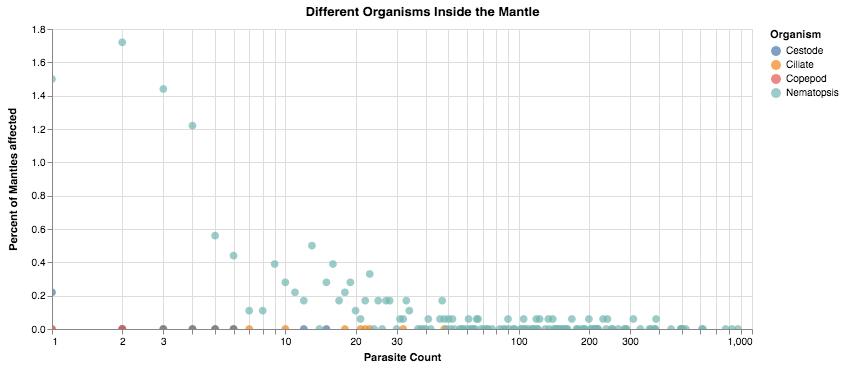

In [376]:
### Plotting - Mantles
click = alt.selection_multi(fields=['Organism'])

chart = alt.Chart(df).mark_circle(size=60).encode(
    alt.X('Parasite Count:Q',
        scale=alt.Scale(type="log")
    ),
    y='Percent of Mantles affected',
    color=alt.condition(click,'Organism', alt.value('lightgray')),
    tooltip=['Organism', "Parasite Count", "Percent of Mantles affected"]
).properties(selection=click, width=700, title="Different Organisms Inside the Mantle")

chart.interactive()

### Ceriod

The ceriod is listed as "Distinct brown - yellow aggregates that may occur in large clumps, and appear to be involvedin metabolite accumulation and detoxification" [[5](#5)].

This feature measures the number of ceriod bodies found on the bivalve

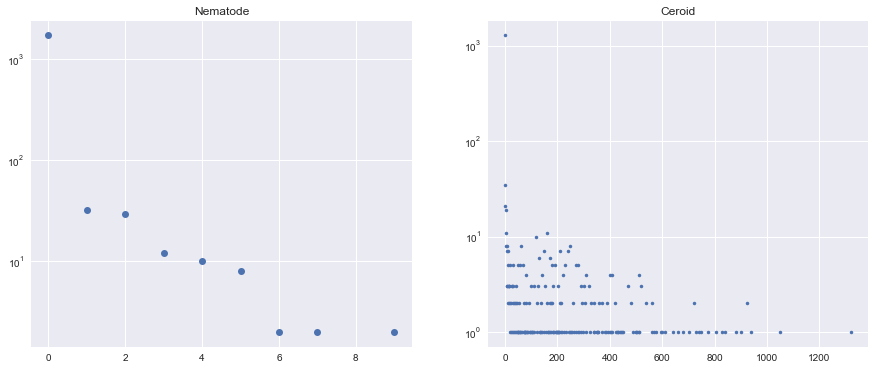

In [526]:
fig, axarr = plt.subplots(1, 2, figsize=(15, 6))

histopaths.nematode.fillna(0, inplace=True)
axarr[0].plot(histopaths.nematode.value_counts(), ".", markersize=14)
axarr[0].set_yscale('log')
axarr[0].set_title("Nematode")

histopaths.ceroid.fillna(0, inplace=True)
axarr[1].plot(histopaths.ceroid.value_counts(), ".", markersize=7)
axarr[1].set_yscale('log')
axarr[1].set_title("Ceroid");

### Volume

As we can see from the r value, the relationship is nearly linear.  From the plot you will notice an outlier (it's actually 12 points with the same value).  These outliers all have the same nst_sample_id.  I'm guessing this id can be sourced to one person who perhaps was misinformed.

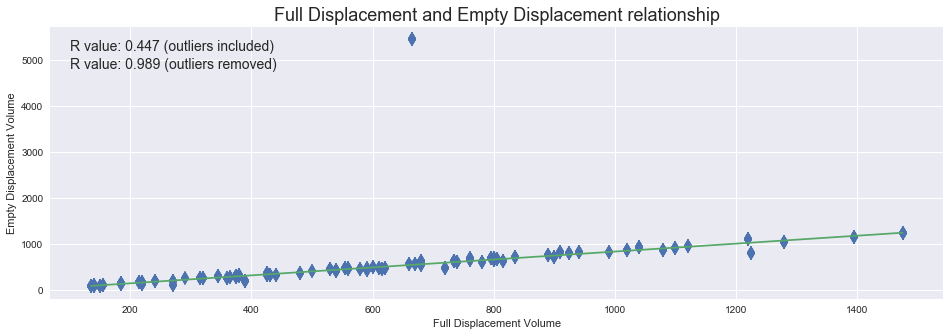

In [66]:
from scipy.stats import linregress

plt.figure(figsize=(16, 5))
plt.title("Full Displacement and Empty Displacement relationship", fontsize=18)
plt.xlabel("Full Displacement Volume")
plt.ylabel("Empty Displacement Volume")

### Actual data
temp1 = histopaths[(histopaths.full_displacement_volume.notnull()) & (histopaths.empty_displacement_volume.notnull())]
x1 = temp1["full_displacement_volume"]
y1 = temp1["empty_displacement_volume"]
plt.plot(x1, y1, "d", markersize=10)

### r2 value with outliers
slope, intercept, r_value, _, _ = linregress(x1, y1)
plt.text(100, 5200, s="R value: {} (outliers included)".format(int(r_value*1000)/1000), fontsize=14)

### removing outliers
temp2 = temp1[temp1.empty_displacement_volume < 5000]
x1 = temp2["full_displacement_volume"]
y1 = temp2["empty_displacement_volume"]

### Fit line and new r2 value
slope, intercept, r_value, _, _ = linregress(x1, y1)
x2 = np.linspace(min(x1[x1.notnull()]), max(x1[x1.notnull()]), 2)
y2 = [slope * x2[0] + intercept, slope * x2[1] + intercept]
plt.plot(x2, y2)
plt.text(100, 4800, s="R value: {} (outliers removed)".format(int(r_value*1000)/1000), fontsize=14)

del x1, x2, y1, y2, temp1, temp2, slope, intercept, r_value

In [161]:
temp = histopaths[histopaths.empty_displacement_volume > 5000].nst_sample_id.value_counts()
print(f"Number of outliers: {color.BOLD}{sum(temp.values)}{color.END}")
print(f"ID(s) associated with outliers: {color.BOLD}{', '.join(temp.index)}{color.END}")
histopaths[histopaths.empty_displacement_volume > 5000]

Number of outliers: 12
ID(s) associated with outliers: SS2010PBPH1CV


bucephalus  ceroid  cestode_body  cestode_gill  cestode_mantle  \
1208         0.0   210.0           0.0           0.0             0.0   
1209         0.0   130.0           0.0           0.0             0.0   
1210         0.0    70.0           0.0           0.0             0.0   
1211         0.0    50.0           0.0           0.0             0.0   
1212         0.0   210.0           0.0           0.0             0.0   
1639         NaN     NaN           NaN           NaN             NaN   
1640         NaN     NaN           NaN           NaN             NaN   
1641         NaN     NaN           NaN           NaN             NaN   
1642         NaN     NaN           NaN           NaN             NaN   
1643         NaN     NaN           NaN           NaN             NaN   
1644         NaN     NaN           NaN           NaN             NaN   
1645         NaN     NaN           NaN           NaN             NaN   

      ciliate_digestive_tract  ciliate_gut  ciliate_large_gill  \
1208                      0.0          0.0                 0.0   
1209                      0.0          0.0                 0.0   
1210                      0.0          0.0                 0.0   
1211                      0.0          0.0                 0.0   
1212                      1.0          0.0                 0.0   
1639                      NaN          NaN                 NaN   
1640                      NaN          NaN                 NaN   
1641                      NaN          NaN                 NaN   
1642                      NaN          NaN                 NaN   
1643                      NaN          NaN                 NaN   
1644                      NaN          NaN                 NaN   
1645                      NaN          NaN                 NaN   

      ciliate_small_gill coastal_ecological_area  \
1208                 0.0           Emerald Coast   
1209                 0.0           Emerald Coast   
1210                 0.0           Emerald Coast   
1211                 0.0           Emerald Coast   
1212                 0.0           Emerald Coast   
1639                 NaN           Emerald Coast   
1640                 NaN           Emerald Coast   
1641                 NaN           Emerald Coast   
1642                 NaN           Emerald Coast   
1643                 NaN           Emerald Coast   
1644                 NaN           Emerald Coast   
1645                 NaN           Emerald Coast   

                             condition_code_description  copepod_body  \
1208  Good : Not quite as firm or large as above; us...           0.0   
1209  Good : Not quite as firm or large as above; us...           0.0   
1210  Very Good : Animal firm and filling shell cavi...           0.0   
1211  Very Good : Animal firm and filling shell cavi...           0.0   
1212  Good : Not quite as firm or large as above; us...           0.0   
1639  Very Good : Animal firm and filling shell cavi...           NaN   
1640  Good : Not quite as firm or large as above; us...           NaN   
1641  Good : Not quite as firm or large as above; us...           NaN   
1642  Very Good : Animal firm and filling shell cavi...           NaN   
1643  Good : Not quite as firm or large as above; us...           NaN   
1644  Good : Not quite as firm or large as above; us...           NaN   
1645  Good : Not quite as firm or large as above; us...           NaN   

      copepod_gill  copepod_gut_digestive_tubule dermo  \
1208           0.0                           0.0     L   
1209           0.0                           0.0     N   
1210           0.0                           0.0     N   
1211           0.0                           0.0     N   
1212           0.0                           0.0     N   
1639           NaN                           NaN     N   
1640           NaN                           NaN     N   
1641           NaN                           NaN     N   
1642           NaN                           NaN     N   
164

<a id="hist_size"></a>

### [^](#toc) Size

The units aren't defined anywhere, however I believe Length is in inches (2.54cm) and Wet Wight is in ounces (28.35g) based on the dimensions of the quagga mussel [[6](#6)] and zebra mussel [[7](#7)].

A few things to note:
- The relatioship between width and length looks approximately cubric
- The smallest bivalves are from the Great Lakes.  I imagine this is because rivers and the ocean have more oxygen than a still lake and can thus support bigger organisms
- "Alabama to Branzos River" has the biggest spread and heaviest organisms
- "Florida Gulf Coast" has a simliar distribution to "Florida Keys to Cape Hatteras"

<u>Note</u>: I spent an unreasonable amount of time on this plot, you can highlight different regions, zoom, and pan

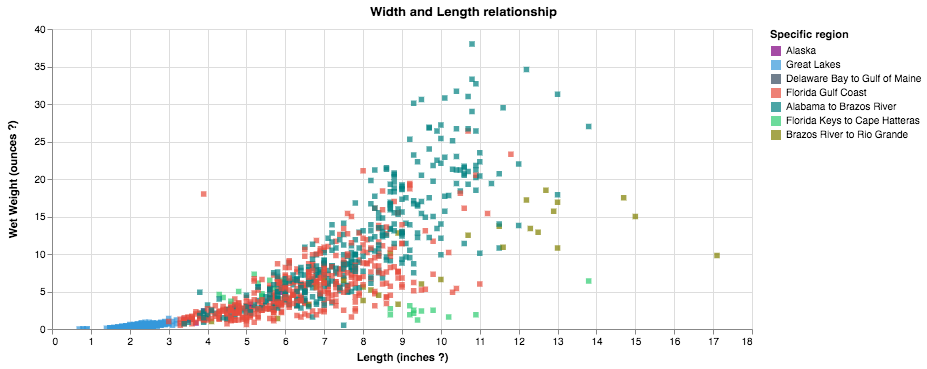

In [503]:
temp = histopaths[["length", "wet_weight", "specific_region"]]
temp.columns = ["Length (inches ?)", "Wet Weight (ounces ?)", "Specific region"]

click = alt.selection_multi(fields=['Specific region'])
palette = alt.Scale(domain=['Alaska', 'Great Lakes', 'Delaware Bay to Gulf of Maine',
                           'Florida Gulf Coast', 'Alabama to Brazos River',
                           'Florida Keys to Cape Hatteras', 'Brazos River to Rio Grande'],
                    range=["purple", "#3498db", "#34495e", "#e74c3c", "teal", "#2ecc71", "olive"])

chart = alt.Chart(temp).mark_square().encode(
    x='Length (inches ?)',
    y='Wet Weight (ounces ?)',
    opacity=alt.value(0.7),
    tooltip=['Specific region', "Length (inches ?)", "Wet Weight (ounces ?)"],
    color=alt.condition(click,
                        'Specific region', alt.value('lightgray'), scale=palette)
).properties(selection=click, width=700, title="Width and Length relationship")

chart.interactive()

<a id="appendix"></a>

# [^](#toc) <u>Appendix</u>

<a id="app_a"></a>

### [^](#toc) Appendix A: Links to different PAHs

[Benzo[a]pyrene](https://en.wikipedia.org/wiki/Benzo%28a%29pyrene), [Benz[a]anthracene](https://en.wikipedia.org/wiki/Benz%28a%29anthracene), [Dibenzo[a,h]anthracene](https://en.wikipedia.org/wiki/Dibenz%28a,h%29anthracene), [Benzo[e]pyrene](https://en.wikipedia.org/wiki/Benzo%28e%29pyrene), [Anthracene](https://en.wikipedia.org/wiki/Anthracene), [Fluorene](https://en.wikipedia.org/wiki/Fluorene), [Perylene](https://en.wikipedia.org/wiki/Perylene), [Chrysene](https://en.wikipedia.org/wiki/Chrysene), [Fluoranthene](https://en.wikipedia.org/wiki/Fluoranthene), [Pyrene](https://en.wikipedia.org/wiki/Pyrene), [Acenaphthene](https://en.wikipedia.org/wiki/Acenaphthene), [Indeno[1,2,3-c,d]pyrene](https://pubchem.ncbi.nlm.nih.gov/compound/Indeno_1_2_3-cd_pyrene#section=Top), [Benzo[g,h,i]perylene](https://en.wikipedia.org/wiki/Benzo%28ghi%29perylene), [Phenanthrene](https://en.wikipedia.org/wiki/Phenanthrene), [Acenaphthylene](https://en.wikipedia.org/wiki/Acenaphthylene), [Benzobfluoranthene][Benzobfluoranthene], [Naphthalene](https://en.wikipedia.org/wiki/Naphthalene), [Hexachlorobenzene](https://en.wikipedia.org/wiki/Hexachlorobenzene), [Benzo[k]fluoranthene](https://en.wikipedia.org/wiki/Benzo%28k%29fluoranthene), [2,6-Dimethylnaphthalene](https://en.wikipedia.org/wiki/2,6-Dimethylnaphthalene), [1,6,7-Trimethylnaphthalene](https://pubchem.ncbi.nlm.nih.gov/compound/2_3_5-Trimethylnaphthalene#section=Top), [Dibenzofuran](https://en.wikipedia.org/wiki/Dibenzofuran), [Biphenyl](https://en.wikipedia.org/wiki/Biphenyl) (Technically an aromatic hydrocarbon)

[Benzobfluoranthene]: https://en.wikipedia.org/wiki/Benz(e)acephenanthrylene

<a id="references"></a>

# [^](#toc) <u>References</u>

<a id="1"></a>
[[1](https://www.kaggle.com/sohier/mussel-watch)] The Mussel Watch dataset hosted on Kaggle.  
<a id="2"></a>
[[2](https://products.coastalscience.noaa.gov/collections/ltmonitoring/nsandt/data2.aspx)] The full original data from NOAA's website.   
<a id="3"></a>
[[3](https://storage.googleapis.com/kaggle-datasets/2251/4287/Pollutants_Data_Dictionary.pdf?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1529789274&Signature=s4iUZazdL5JahAMiwekWxoejFeIXpM6z20O4MatauPnzwpxGI5waGuxp3x%2B1448LuCoVvuM2BWCW%2FFEBxny5COUoKKoZ%2FcH9ztr5T5BBZacj6Ql3vvLByARZdRfh%2BbIgBGCxNX5bl8TFNLh26fHA9TkMb6j55btdLlZoCAlYEPvhJ1OXn1Ul8%2BzoiOXOGle4huxreWqRwHL9W0dQqoC9xvyaLwBTnOGDYTsOGlu09hgr3ldDUZvqX0Mua%2BJWFuHgX5mev6GNiZvOU%2FmGhply90fSjNX4cWzyP85ICS5Lij5m1zEj75dYjbDGflWSsImqF0KHnPUMTC5ZoIJ2Y9FPOA%3D%3D)] Pollutants dataset feature dictionary  
<a id="4"></a>
[[4](https://storage.googleapis.com/kaggle-datasets/2251/4287/Sites_Data_Dictionary.pdf?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1529789336&Signature=kUS7FoYlUqxwkWwykdnRzLuQR2v4mq8HF6iBtAyJJXcz3vJBLMjmQchvJSYoltbDIEiNgP0KTq1o66kSSd7gB2gVSgqXrXPivF3Ycxyj7StXw394KBDmMTXGtgwi5mMdKT9664AQDR%2BHowts8iv1W2ftZHNkGXtA1nJLlNKKDAeVU9lJeIomz9UW1RxULuVtSSSEEEZmtONq0TYto4RKjWWkirggjDOfKsyoW3vHJVCN6cs%2BkNlBjMXDWjgDUu0zXco5VVZeJw7hPl5ey3ws8CzAF8c0SbqaGGPXhrQBZrZGknD31zFkH8k%2BMKWUs9lmFk%2F8rmMWXkuZOX5NskpptQ%3D%3D)] Sites dataset feature dictionary  
<a id="5"></a>
[[5](https://cdn.coastalscience.noaa.gov/datasets/nsandt/dictionaries/Histopath_Mussel_Data_Dictionary.pdf)] Histopaths dataset feature dictionary  
<a id="6"></a>
[[6](https://nas.er.usgs.gov/queries/factsheet.aspx?speciesid=95)] USGC page on the quagga mussel  
<a id="7"></a>
[[7](https://nas.er.usgs.gov/queries/FactSheet.aspx?speciesID=5)] USGC page on the zebra mussel  
<a id="8"></a>
[[8](http://www.caslab.com/News/pah-analysis-expanded-compounds-of-concern-and-advancements.html)] CAS Labs' article on PAHs.  References from here can be easily found with command-F and the chemicals name.  
<a id="9"></a>
[[9](https://www.fda.gov/Food/FoodborneIllnessContaminants/Metals/ucm172050.htm)] The FDA's recommendation for maximum levels of lead in candy.  
<a id="10"></a>
[[10](https://www.fda.gov/Food/FoodborneIllnessContaminants/Metals/ucm319948.htm)] The FDA's recommendation for maximum levels of arsenic in rice.  
<a id="11"></a>
[[11](https://www.atsdr.cdc.gov/csem/csem.asp?csem=13&po=8)] The CDC's recommendation for maximum levels of PAHs in water.  
<a id="12"></a>
[[12](https://www.sciencedirect.com/topics/medicine-and-dentistry/chlorinated-hydrocarbon)] The beginning of "Ramesh C. Gupta, Dejan Milatovic 2014" explains the different Organochlorine insecticides.   

<a id="further_reading"></a>

# [^](#toc) <u>Further Reading</u>

- For a preview of the possible fate of corral reefs, see [this paper](https://link.springer.com/article/10.1007%2Fs00338-011-0839-y) from Elizabeth Crook in UC Santa Cruz
- Here's a [video](https://www.youtube.com/watch?v=6d9G_G2vP1Y) of the Wisconsin Mussel Watch program
- The Earth Institute has a nice article <u>[Can We Save Coral Reefs?](http://blogs.ei.columbia.edu/2015/08/17/can-we-save-coral-reefs/)</u> by Christine Evans.
- KOMO News from Seattle has a great [report](http://komonews.com/news/local/mussels-unlocking-secrets-to-whats-in-the-water) on a Mussel Watch

# What I do?

Taken from Colubia's website ([link](http://blogs.ei.columbia.edu/2011/06/13/losing-our-coral-reefs/)):

"""
Concerned individuals can become citizen scientists and monitor corals at restoration sites, or [volunteer](https://coralreef.noaa.gov/education/volunteer.html) to monitor marine sanctuaries, protect marine wildlife or clear ocean debris.  Everyone can help coral reefs by practicing sustainable fishing, and eating only sustainably caught fish. When vacationing near coral reefs, be careful not to touch them and don’t buy souvenirs of coral or other marine species.
"""

# Thank you!

This was a lot of fun to make!  I hope you learned a little more about Python's visualization tools and about mussels!